In [2]:
import numpy as np
from importlib import reload
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from utils import create_dataset, show_misclassified, get_percent_misclassified
from features import run3_SIFT_transforms
from classifiers import KNearestNeighbors, SupportVectorClassifer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [6]:
transform = run3_SIFT_transforms(step_size=4)
dataset = create_dataset("./training/", transform, labeled=True)
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)


# load labeled data 
X, y, paths, path_class_idxs = next(iter(dataloader))
X=X.numpy()
y=y.numpy()

In [3]:
df = pd.DataFrame({'crop':[50, 100, 150, 200], 'score':[0.158, 0.20, 0.201, 0.24]})

<Figure size 432x288 with 0 Axes>

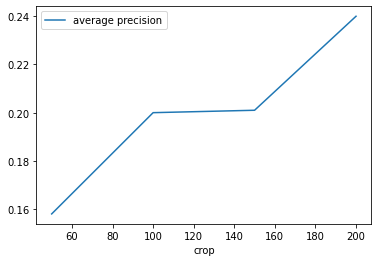

In [14]:
plt.figure()
df.plot(x="crop", y='score', label='average precision').get_figure().savefig('prec_vs_crop.jpg')

In [13]:
import classifiers

In [23]:
classifiers = reload(classifiers)

In [9]:
X_bovw = features.get_bovw(X, num_clusters=10)

(1500, 1, 4096, 128)
(6144000, 128)


In [11]:
X_train, X_val, y_train, y_val, paths_train, paths_val = train_test_split(X_bovw, y, paths, test_size=0.2, stratify=y)

In [24]:
classifier_name = 'SVC'
classifier_hparams = {'C':[1e-2, 1e-1, 1, 500, 1e2, 1e3]}
# params for instantiating classifier
# parameter grid to search over when tuning classifier
param_grid = [
        {'C':[2**i for i in range(-5, 1)]}, 
        {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
        {'random_state':[10]}
]
classifier = classifiers.SupportVectorClassifer(**classifier_hparams)
best_score, best_params = classifier.tune(
    X_train,
    y_train, 
    param_grid=param_grid
    ) # tunes classifier and writes to metrics file

/Users/gavinayres/.pyenv/versions/3.8.4/envs/deeplearningTorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gavinayres/.pyenv/versions/3.8.4/envs/deeplearningTorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gavinayres/.pyenv/versions/3.8.4/envs/deeplearningTorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [19]:
classifier_hparams = {'n_neighbors':2, 'n_jobs':-1}
# params for instantiating classifier
# parameter grid to search over when tuning classifier
param_grid = {
    'n_neighbors':[i for i in range(1, 25)],
    'n_jobs':[-1]
}
classifier = KNearestNeighbors(**classifier_hparams)
best_score, best_params = classifier.tune(
    X_train,
    y_train, 
    param_grid=param_grid
    ) # tunes classifier and writes to metrics file
print(f"Best parameters: {best_params}\n")
print(f"Best score: {best_score}\n")

Best parameters: {'n_jobs': -1, 'n_neighbors': 23}

Best score: 0.5096007986295992



In [24]:
# what about an SVM?
lin_clf = SVC()
lin_clf.fit(X_train, y_train)


SVC()

In [25]:
lin_clf.score(X_val, y_val)

0.5866666666666667

In [33]:
# what about a random forest classifier?
clf = RandomForestClassifier(n_jobs=-1, min_samples_leaf=10)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_jobs=-1)

In [34]:
clf.score(X_val, y_val)

0.5933333333333334